In [67]:
# basic
import pandas as pd   
import numpy as np 
import os

# visualization
import matplotlib.pyplot as plt  
import seaborn as sns             

# statistical analysis
import scipy.stats as stats  
from scipy.stats import shapiro # normality check
from scipy.stats import mannwhitneyu # non-parametric test for un-normal distribution
from scipy.stats import ks_2samp # Kolmogorov-Smirnov (K-S) Test:

### Load Data

Merged subject behavioral data from open access dataset and restricted datasets.

In [68]:
open_access_data = pd.read_csv("Behavioral Data/Behavioral_Data.csv")
open_access_data.head()

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,5.2,101.12,86.45,2.0,45.9,107.17,105.31,1.80,0.0,1.80
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88


In [69]:
restricted_data = pd.read_csv("Behavioral Data/RESTRICTED_BEHAVIORAL_DATA.csv")
restricted_data.head()

,Subject,Age_in_Yrs,HasGT,ZygositySR,ZygosityGT,Family_ID,Mother_ID,Father_ID,TestRetestInterval,Race,...,SSAGA_Times_Used_Illicits,SSAGA_Times_Used_Cocaine,SSAGA_Times_Used_Hallucinogens,SSAGA_Times_Used_Opiates,SSAGA_Times_Used_Sedatives,SSAGA_Times_Used_Stimulants,SSAGA_Mj_Use,SSAGA_Mj_Ab_Dep,SSAGA_Mj_Age_1st_Use,SSAGA_Mj_Times_Used
0,100004,24,True,NotTwin,,52259_82122,52259,82122,NaN,White,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1,100206,27,True,NotTwin,,56037_85858,56037,85858,NaN,White,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2,100307,27,True,NotMZ,MZ,51488_81352,51488,81352,NaN,White,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
3,100408,33,True,MZ,MZ,51730_81594,51730,81594,NaN,White,...,4.0,5.0,5.0,5.0,0.0,0.0,1.0,1.0,2.0,4.0
4,100610,27,True,NotMZ,DZ,52813_82634,52813,82634,NaN,White,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [70]:
subject_data = open_access_data.merge(restricted_data, how = 'inner', on = 'Subject')
subject_data.head()

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,SSAGA_Times_Used_Illicits,SSAGA_Times_Used_Cocaine,SSAGA_Times_Used_Hallucinogens,SSAGA_Times_Used_Opiates,SSAGA_Times_Used_Sedatives,SSAGA_Times_Used_Stimulants,SSAGA_Mj_Use,SSAGA_Mj_Ab_Dep,SSAGA_Mj_Age_1st_Use,SSAGA_Mj_Times_Used
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,4.0,5.0,5.0,5.0,0.0,0.0,1.0,1.0,2.0,4.0
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [71]:
subject_data.shape

(1206, 782)

Also merged with the brain functional activity data.

In [72]:
folder = 'HCP_PTN1200/node_timeseries/3T_HCP1200_MSMAll_d15_ts2'
#looping through the folder
brain_files = [f for f in os.listdir(folder) if f.endswith('.txt')] # one per subject
brain_data = {}

for filename in brain_files:
    subject_id = int(filename[:6])
    file_path = os.path.join(folder, filename)
    subject_brain_data = np.loadtxt(file_path)
    brain_data[subject_id] = subject_brain_data

# brain_data: a dictionary with 1003 keys, one for each subject. The values are the brain data, each is an array of shape (4800 timepoints, 15 regions)

In [73]:
len(brain_data), brain_data[237334].shape, brain_data.keys()

(1003,
 (4800, 15),
 dict_keys([237334, 870861, 557857, 159441, 531536, 157336, 395756, 168139, 401422, 389357, 497865, 573249, 102109, 894067, 151223, 148941, 155938, 387959, 123925, 706040, 151425, 257946, 174841, 984472, 108222, 971160, 211720, 800941, 788876, 192136, 151627, 108020, 147737, 992774, 207426, 393247, 140925, 172029, 151829, 175035, 153025, 578057, 520228, 748662, 249947, 180533, 255639, 175237, 346137, 185846, 153227, 835657, 105115, 176845, 613538, 562345, 149337, 121921, 108828, 397154, 274542, 886674, 567759, 922854, 131924, 395958, 742549, 212823, 889579, 143426, 668361, 210011, 165436, 869472, 194140, 748258, 617748, 771354, 378756, 185139, 905147, 194746, 368551, 188347, 468050, 165032, 210415, 309636, 163331, 436845, 368753, 188145, 136126, 210617, 173334, 303119, 412528, 212015, 161731, 295146, 122620, 765056, 118225, 141422, 101006, 186141, 196346, 885975, 212217, 128127, 665254, 105923, 114621, 196144, 486759, 167036, 692964, 627852, 882161, 186545, 495255, 

In [74]:
brain_data[237334][4799]

array([ 29.292 ,  41.092 , -22.562 ,  31.175 , -21.044 , -19.359 ,
        21.63  , -12.577 , -84.069 ,  62.594 ,  -8.9941,   8.4692,
        18.378 ,   3.3339, -36.84  ])

In [75]:
brain_data_df = pd.DataFrame({
    'Subject': list(brain_data.keys()),
    'Brain_Data': list(brain_data.values())  # (4800, 15) arrays
})
brain_data_df

,Subject,Brain_Data
0,237334,"[[28.289, -118.37, -95.748, -62.766, -6.7833, ..."
1,870861,"[[-62.695, 26.378, -3.5179, -79.632, 29.268, -..."
2,557857,"[[-16.119, -71.219, -20.493, 24.638, 39.683, -..."
3,159441,"[[-155.59, -60.046, -133.96, -38.999, 64.654, ..."
4,531536,"[[-6.417, 3.8926, -16.901, 23.501, 120.68, 38...."
...,...,...
998,209228,"[[-13.679, -103.72, -152.93, -37.141, 30.098, ..."
999,139435,"[[63.369, 75.124, -5.5074, 108.31, -8.646, -11..."
1000,406432,"[[-56.947, 23.371, 35.352, -45.684, -43.927, -..."
1001,156031,"[[2.7852, -17.051, -31.381, 16.649, 22.764, -8..."


In [76]:
data = subject_data.merge(brain_data_df, on='Subject', how='inner')
data.head(3)

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,SSAGA_Times_Used_Cocaine,SSAGA_Times_Used_Hallucinogens,SSAGA_Times_Used_Opiates,SSAGA_Times_Used_Sedatives,SSAGA_Times_Used_Stimulants,SSAGA_Mj_Use,SSAGA_Mj_Ab_Dep,SSAGA_Mj_Age_1st_Use,SSAGA_Mj_Times_Used,Brain_Data
0,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,"[[59.028, -44.695, 18.952, 73.027, 13.956, 12...."
1,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,"[[-12.084, -37.572, 30.914, -42.308, 47.674, 6..."
2,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,5.0,5.0,5.0,0.0,0.0,1.0,1.0,2.0,4.0,"[[-78.361, -25.041, 69.902, -47.022, 76.928, 9..."


In [77]:
data.shape

(1003, 783)

### EDA

**Handedness**: The Edinburgh Handedness questionnaire is used to calculate handedness scores based on self-reported preferences for performing daily tasks. Participants indicate which hand they usually prefer for tasks such as writing, throwing, using scissors, etc.

**Handedness Score** = [(Number of right-hand tasks - Number of left-hand tasks) / Total number of tasks] × 100


Negative scores indicate left-hand dominance, while positive scores indicate right-hand dominance. Range from -100 to +100

only 8.7% reported as left_handed, and 90% self reports as right-handed

In [78]:
left_handed = data[data['Handedness'] < 0]
right_handed = data[data['Handedness'] > 0]

# Handedness statistics
pd.DataFrame([
    left_handed.describe()['Handedness'], 
    right_handed.describe()['Handedness'], 
    data['Handedness'].describe()
], index=['Left-Handed', 'Right-Handed', 'Overall']).T

,Left-Handed,Right-Handed,Overall
count,88.000000,912.000000,1003.000000
mean,-57.670455,78.514254,66.331007
std,26.576163,19.385789,43.608425
min,-100.000000,5.000000,-100.000000
25%,-80.000000,70.000000,60.000000
50%,-60.000000,80.000000,80.000000
75%,-40.000000,95.000000,95.000000
max,-5.000000,100.000000,100.000000


Plot the overall distribution of Handedness

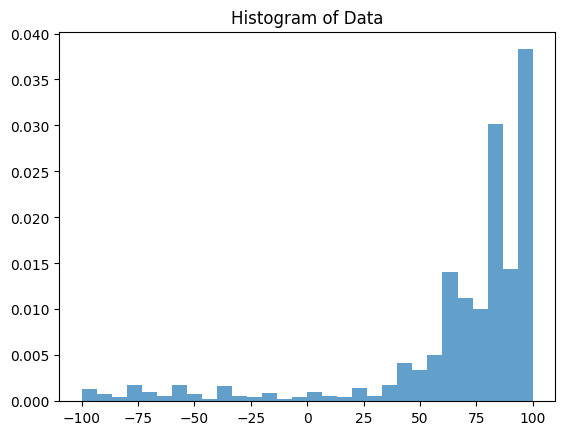

In [79]:
plt.hist(data['Handedness'], bins=30, density=True, alpha=0.7)
plt.title("Histogram of Data")
plt.show()

Plot the distribution of Handedness for left and right-handed subjects

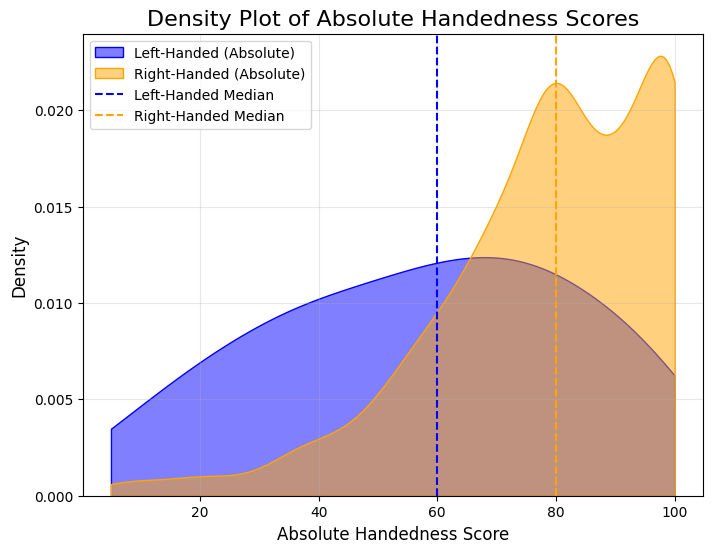

In [80]:
# Take absolute values of Handedness
left_handed_abs = left_handed['Handedness'].abs()
right_handed_abs = right_handed['Handedness'].abs()

plt.figure(figsize=(8, 6))

sns.kdeplot(left_handed_abs, color='blue', label='Left-Handed (Absolute)', fill=True, alpha=0.5, cut=0)
sns.kdeplot(right_handed_abs, color='orange', label='Right-Handed (Absolute)', fill=True, alpha=0.5, cut=0)


# mark medians
plt.axvline(left_handed_abs.median(), color='blue', linestyle='--', label='Left-Handed Median')
plt.axvline(right_handed_abs.median(), color='orange', linestyle='--', label='Right-Handed Median')

# Labels and title
plt.xlabel('Absolute Handedness Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Density Plot of Absolute Handedness Scores', fontsize=16)
plt.legend()

plt.grid(alpha=0.3)
plt.show()

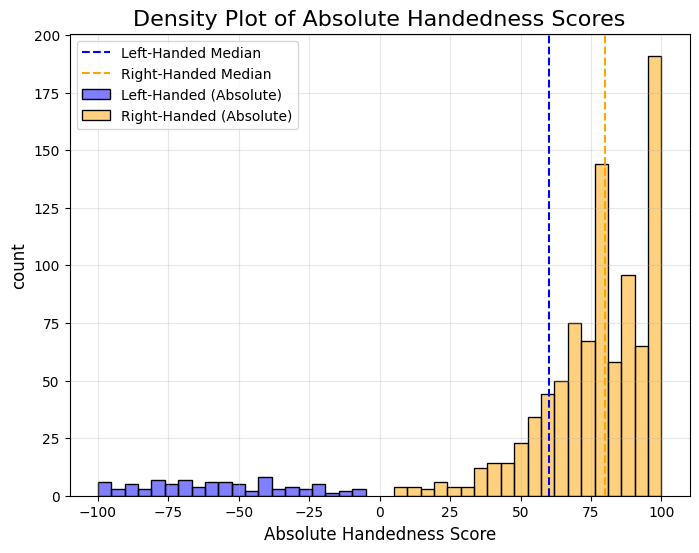

In [133]:
# Take absolute values of Handedness
left_handed_abs = left_handed['Handedness'].abs()
right_handed_abs = right_handed['Handedness'].abs()

plt.figure(figsize=(8, 6))
sns.histplot(left_handed['Handedness'], color='blue', label='Left-Handed (Absolute)', kde=False, bins=20, alpha=0.5)
sns.histplot(right_handed['Handedness'], color='orange', label='Right-Handed (Absolute)', kde=False, bins=20, alpha=0.5)


# mark medians
plt.axvline(left_handed_abs.median(), color='blue', linestyle='--', label='Left-Handed Median')
plt.axvline(right_handed_abs.median(), color='orange', linestyle='--', label='Right-Handed Median')

# Labels and title
plt.xlabel('Absolute Handedness Score', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.title('Density Plot of Absolute Handedness Scores', fontsize=16)
plt.legend()

plt.grid(alpha=0.3)
plt.show()

In [104]:
left_handed["Handedness"]

7      -75
9      -25
36     -40
46     -20
50     -15
      ... 
948     -5
949    -40
957    -65
964   -100
966    -70
Name: Handedness, Length: 88, dtype: int64

In [109]:
np.log10(100)

np.float64(2.0)

/var/folders/bz/8tkr7qg51_1bcjy3cf4g8fzc0000gn/T/ipykernel_28089/336589625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_handed['log_transformed_handedness'] = np.log10(100-left_handed['Handedness'])
/opt/homebrew/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/bz/8tkr7qg51_1bcjy3cf4g8fzc0000gn/T/ipykernel_28089/336589625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

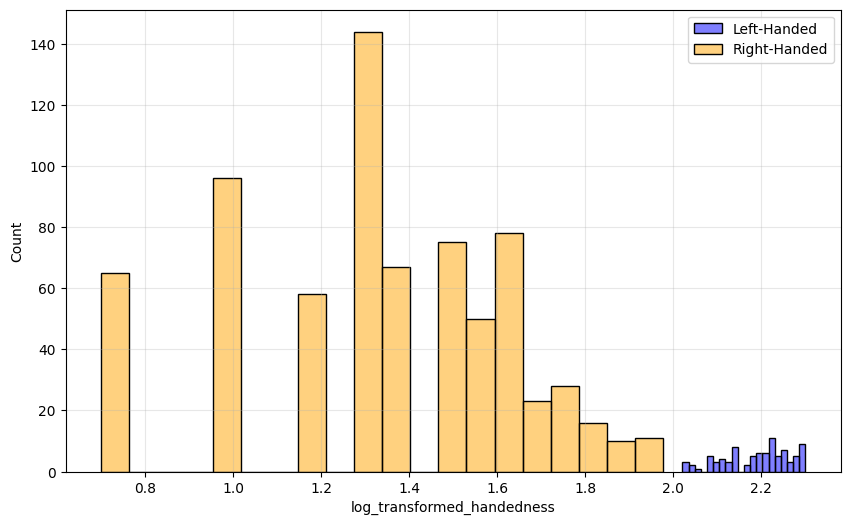

In [131]:
left_handed['log_transformed_handedness'] = np.log10(100-left_handed['Handedness'])
right_handed['log_transformed_handedness'] = np.log10(100-right_handed['Handedness'])

plt.figure(figsize=(10, 6))
sns.histplot(data=left_handed['log_transformed_handedness'].abs(), label='Left-Handed', color='blue', kde=False, bins=20, alpha=0.5)
sns.histplot(data=right_handed['log_transformed_handedness'], label='Right-Handed', color='orange', kde=False, bins=20, alpha=0.5)

plt.legend()
plt.grid(alpha=0.3)
plt.show()

/var/folders/bz/8tkr7qg51_1bcjy3cf4g8fzc0000gn/T/ipykernel_28089/2596915916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_handed['sqrt_transformed_handedness'] = left_handed['Handedness']**0.5
/var/folders/bz/8tkr7qg51_1bcjy3cf4g8fzc0000gn/T/ipykernel_28089/2596915916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_handed['sqrt_transformed_handedness'] = right_handed['Handedness']**0.5


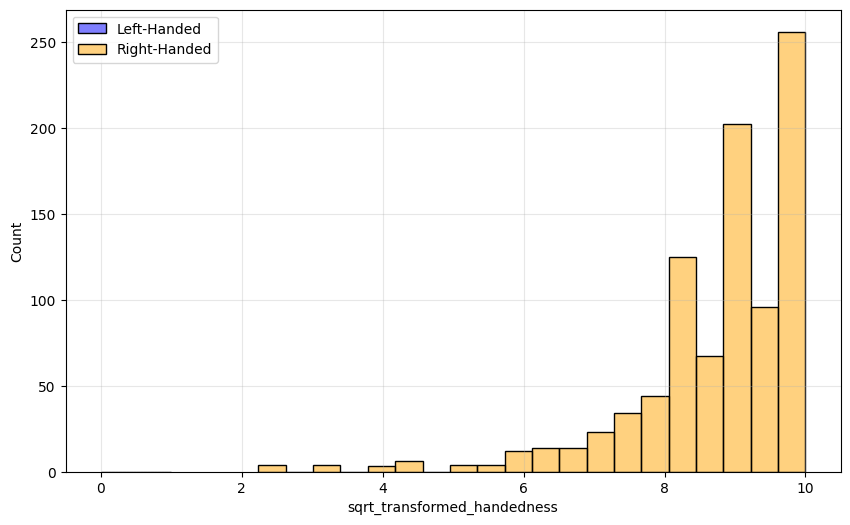

In [138]:
left_handed['sqrt_transformed_handedness'] = left_handed['Handedness']**0.5
right_handed['sqrt_transformed_handedness'] = right_handed['Handedness']**0.5

plt.figure(figsize=(10, 6))
sns.histplot(data=left_handed['sqrt_transformed_handedness'], label='Left-Handed', color='blue', kde=False, bins=20, alpha=0.5)
sns.histplot(data=right_handed['sqrt_transformed_handedness'], label='Right-Handed', color='orange', kde=False, bins=20, alpha=0.5)

plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [129]:
# min_value = left_handed['Handedness'].min()
# left_handed['reflected'] = min_value + 1 - left_handed['Handedness']
# left_handed['log_transformed'] = np.log10(left_handed['reflected'])

# max_value = right_handed['Handedness'].max()
# right_handed['reflected'] = max_value + 1 - right_handed['Handedness']
# right_handed['log_transformed'] = np.log10(right_handed['reflected'])

# plt.figure(figsize=(10, 6))
# sns.histplot(data=left_handed['log_transformed_handedness'], label='left_handed', color='blue', kde=False, bins=20, alpha=0.5, stat='density')
# sns.histplot(data=right_handed['log_transformed_handedness'], label='Right-Handed', color='orange', kde=False, bins=20, alpha=0.5, stat='density')
# plt.legend()
# plt.show()

/var/folders/bz/8tkr7qg51_1bcjy3cf4g8fzc0000gn/T/ipykernel_28089/3313332115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_handed['standardized_handedness'] = (left_handed['Handedness'] - mean_value) / std_value
/var/folders/bz/8tkr7qg51_1bcjy3cf4g8fzc0000gn/T/ipykernel_28089/3313332115.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_handed['standardized_handedness'] = (right_handed['Handedness'] - mean_value) / std_value


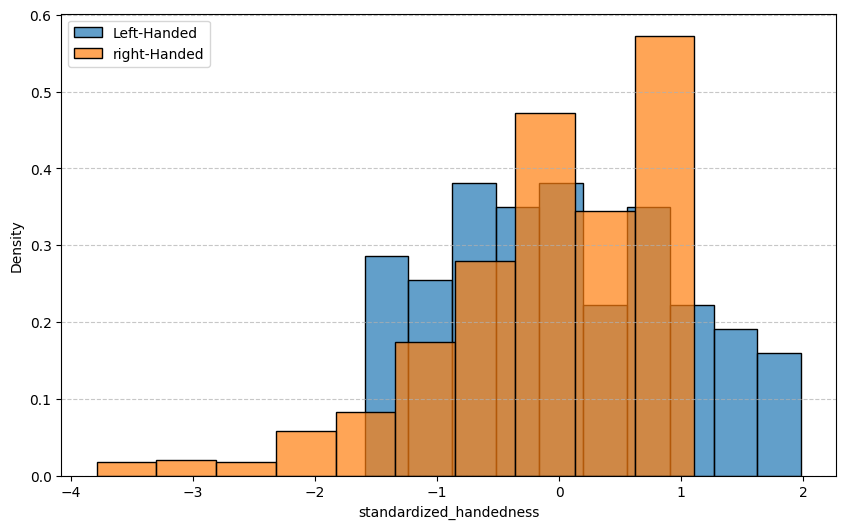

In [117]:
mean_value = left_handed['Handedness'].mean()
std_value = left_handed['Handedness'].std()
left_handed['standardized_handedness'] = (left_handed['Handedness'] - mean_value) / std_value

mean_value = right_handed['Handedness'].mean()
std_value = right_handed['Handedness'].std()
right_handed['standardized_handedness'] = (right_handed['Handedness'] - mean_value) / std_value

plt.figure(figsize=(10, 6))
sns.histplot(left_handed['standardized_handedness'],label='Left-Handed',bins=10, edgecolor='black', alpha=0.7, stat='density')
sns.histplot(right_handed['standardized_handedness'], label='right-Handed',bins=10, edgecolor='black', alpha=0.7, stat='density')

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

In [122]:
right_handed['standardized_handedness']

0      -0.697122
1       0.850404
2      -1.212964
3       0.334562
4       0.592483
          ...   
998    -0.439201
999     1.108325
1000    0.334562
1001   -0.955043
1002    1.108325
Name: standardized_handedness, Length: 912, dtype: float64

In [125]:
right_handed.loc[1001, 'Handedness'], mean_value

(np.int64(60), np.float64(78.51425438596492))

Q-Q Plot (Quantile-Quantile)

Left handed data seemed to be more normally distributed than the right handed. The data is likely normal if the points follow a straight line.

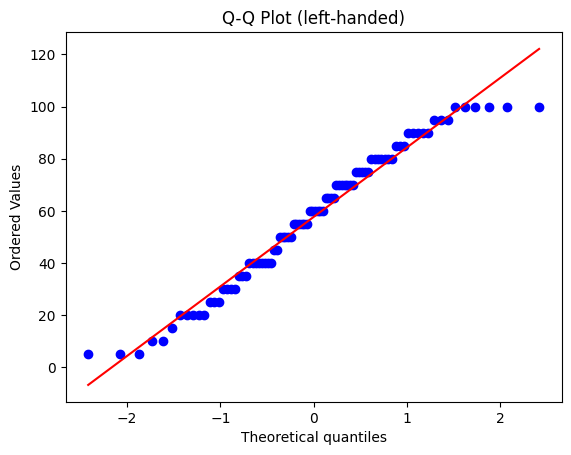

In [82]:
stats.probplot(left_handed_abs, dist="norm", plot=plt)
plt.title("Q-Q Plot (left-handed)")
plt.show()

central part of the distribution seemed normally distributed, but the overall distribution is not normal due to left-skewed tails

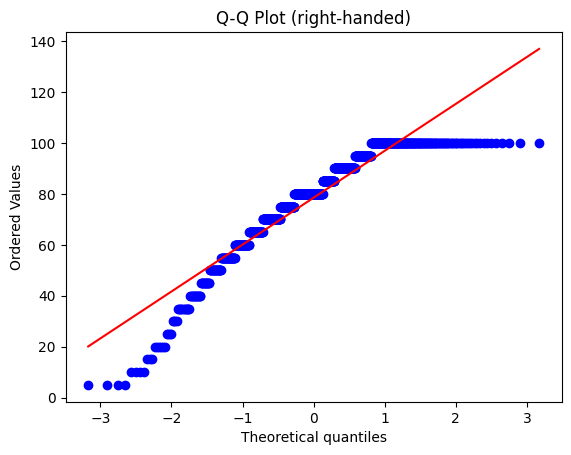

In [83]:
stats.probplot(right_handed_abs, dist="norm", plot=plt)
plt.title("Q-Q Plot (right-handed)")
plt.show()

### Check for Distribution Normality

After normality test, we found out that both of left and right-handed distributions are not normal.

In [84]:
# Test normality for left-handed (absolute values)
stat_left, p_left = shapiro(left_handed_abs)
print(f"Left-Handed: Stat={stat_left}, P-value={p_left}")

# Test normality for right-handed (absolute values)
stat_right, p_right = shapiro(right_handed_abs)
print(f"Right-Handed: Stat={stat_right}, P-value={p_right}")


Left-Handed: Stat=0.9642311848455394, P-value=0.01571961773445103
Right-Handed: Stat=0.8976287608825608, P-value=3.563946911621623e-24


Many parametric hypothesis tests such as t-tests rely on the data's distribution being normal. However as we saw, the distributiosn do not follow a normal distribution, so we can only proceed with non-parametric tests such as the Mann-Whitney U Test for comparing the medians.

### Hypothesis Test On the Medians of the Distributions of Left/Right handed

Mann-Whitney U Test compares medians of distributions and does not require normality of data.

In [85]:
stat, p_value = mannwhitneyu(
    left_handed_abs, 
    right_handed_abs, 
    alternative='two-sided'
)

print("P value:", p_value)


P value: 3.6322011777585514e-13


### Hypothesis Test on CDFs of the Distributions

In [86]:
stat, p_value = ks_2samp(left_handed_abs, right_handed_abs)
print(f"K-S Test Statistic: {stat}, P-value: {p_value}")


K-S Test Statistic: 0.36343700159489634, P-value: 5.492444625226908e-10


Showed significant difference in both the medians and CDFs between the handedness groups.

#### Week 2's Discussion Takeaway

Regression: Keep all data

Classification: try different thresholds to define left and right handedness. After that need to have equal classes by random sampling.

## Classification:

1. Try -/+25% (As of one of the papers did)
2. Try -/+40% 

In [87]:
# Define thresholds
threshold_25 = 25
threshold_40 = 40

# Create classification labels for ±25% threshold
data_25 = data[(data['Handedness'] <= -threshold_25) | (data['Handedness'] >= threshold_25)].copy()
data_25['Class'] = np.where(data_25['Handedness'] >= threshold_25, 1, 0)  # 0: Left-Handed, 1: Right-Handed

# Create classification labels for ±40% threshold
data_40 = data[(data['Handedness'] <= -threshold_40) | (data['Handedness'] >= threshold_40)].copy()
data_40['Class'] = np.where(data_40['Handedness'] >= threshold_40, 1, 0)  # 0: Left-Handed, 1: Right-Handed

data_25['Class'].value_counts(), data_40['Class'].value_counts()


(Class
 1    895
 0     77
 Name: count, dtype: int64,
 Class
 1    875
 0     67
 Name: count, dtype: int64)

In [88]:
# Balance the classes by random sampling
def balance_classes(df, class_column):
    class_0 = df[df[class_column] == 0]
    class_1 = df[df[class_column] == 1]
    
    # Randomly sample the majority class to match the minority class size
    if len(class_0) > len(class_1):
        class_0 = class_0.sample(len(class_1), random_state=42)
    else:
        class_1 = class_1.sample(len(class_0), random_state=42)
    
    return pd.concat([class_0, class_1])

# Apply balancing for ±25% threshold data
balanced_data_25 = balance_classes(data_25, 'Class')

# Apply balancing for ±40% threshold data
balanced_data_40 = balance_classes(data_40, 'Class')

In [89]:
balanced_data_25.shape, balanced_data_40.shape

((154, 784), (134, 784))

In [90]:
balanced_data_25.describe()

,Subject,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,3T_tMRI_PctCompl,fMRI_WM_PctCompl,fMRI_Gamb_PctCompl,fMRI_Mot_PctCompl,fMRI_Lang_PctCompl,...,SSAGA_Times_Used_Cocaine,SSAGA_Times_Used_Hallucinogens,SSAGA_Times_Used_Opiates,SSAGA_Times_Used_Sedatives,SSAGA_Times_Used_Stimulants,SSAGA_Mj_Use,SSAGA_Mj_Ab_Dep,SSAGA_Mj_Age_1st_Use,SSAGA_Mj_Times_Used,Class
count,154.000000,154.000000,154.000000,154.0,154.0,154.000000,154.000000,154.0,154.0,154.000000,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,80.000000,153.000000,154.000000
mean,374674.805195,1.616883,1.538961,4.0,100.0,99.029221,99.350649,100.0,100.0,98.653896,...,0.339869,0.392157,0.313725,0.156863,0.274510,0.522876,0.098039,2.612500,1.418301,0.500000
std,275780.465121,0.487733,0.500106,0.0,0.0,6.191602,8.058230,0.0,0.0,11.368527,...,1.187453,1.119418,1.126654,0.726542,0.994956,0.501117,0.298344,0.934484,1.741953,0.501631
min,101915.000000,1.000000,1.000000,4.0,100.0,48.600000,0.000000,100.0,100.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,152656.250000,1.000000,1.000000,4.0,100.0,100.000000,100.000000,100.0,100.0,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,211017.000000,2.000000,2.000000,4.0,100.0,100.000000,100.000000,100.0,100.0,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.500000
75%,569672.500000,2.000000,2.000000,4.0,100.0,100.000000,100.000000,100.0,100.0,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000,1.000000
max,992673.000000,2.000000,2.000000,4.0,100.0,100.000000,100.000000,100.0,100.0,100.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,4.000000,5.000000,1.000000


In [91]:
balanced_data_40.describe()

,Subject,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,3T_tMRI_PctCompl,fMRI_WM_PctCompl,fMRI_Gamb_PctCompl,fMRI_Mot_PctCompl,fMRI_Lang_PctCompl,...,SSAGA_Times_Used_Cocaine,SSAGA_Times_Used_Hallucinogens,SSAGA_Times_Used_Opiates,SSAGA_Times_Used_Sedatives,SSAGA_Times_Used_Stimulants,SSAGA_Mj_Use,SSAGA_Mj_Ab_Dep,SSAGA_Mj_Age_1st_Use,SSAGA_Mj_Times_Used,Class
count,134.000000,134.000000,134.000000,134.0,134.0,134.000000,134.000000,134.0,134.0,134.000000,...,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,68.000000,133.000000,134.000000
mean,377990.671642,1.641791,1.567164,4.0,100.0,99.267910,99.253731,100.0,100.0,99.199254,...,0.180451,0.368421,0.203008,0.067669,0.127820,0.511278,0.112782,2.602941,1.451128,0.500000
std,272413.707107,0.481273,0.497328,0.0,0.0,4.978716,8.638684,0.0,0.0,8.656941,...,0.868947,1.055101,0.876973,0.463771,0.644482,0.501763,0.317522,0.994608,1.840068,0.501876
min,101915.000000,1.000000,1.000000,4.0,100.0,48.600000,0.000000,100.0,100.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,157237.000000,1.000000,1.000000,4.0,100.0,100.000000,100.000000,100.0,100.0,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,216077.500000,2.000000,2.000000,4.0,100.0,100.000000,100.000000,100.0,100.0,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.500000
75%,585096.000000,2.000000,2.000000,4.0,100.0,100.000000,100.000000,100.0,100.0,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000,1.000000
max,923755.000000,2.000000,2.000000,4.0,100.0,100.000000,100.000000,100.0,100.0,100.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,4.000000,5.000000,1.000000


In [92]:
# Handedness statistics
pd.DataFrame([
    balanced_data_25.describe()['Handedness'], 
    balanced_data_40.describe()['Handedness'], 
    data['Handedness'].describe()
], index=['25%', '40%', 'Overall']).T

,25%,40%,Overall
count,154.000000,134.000000,1003.000000
mean,8.409091,5.223881,66.331007
std,74.967759,76.482505,43.608425
min,-100.000000,-100.000000,-100.000000
25%,-65.000000,-70.000000,60.000000
50%,7.500000,2.500000,80.000000
75%,80.000000,80.000000,95.000000
max,100.000000,100.000000,100.000000


### Plot distributions of handedness and other (demographic) features (as brain features TBD for now)

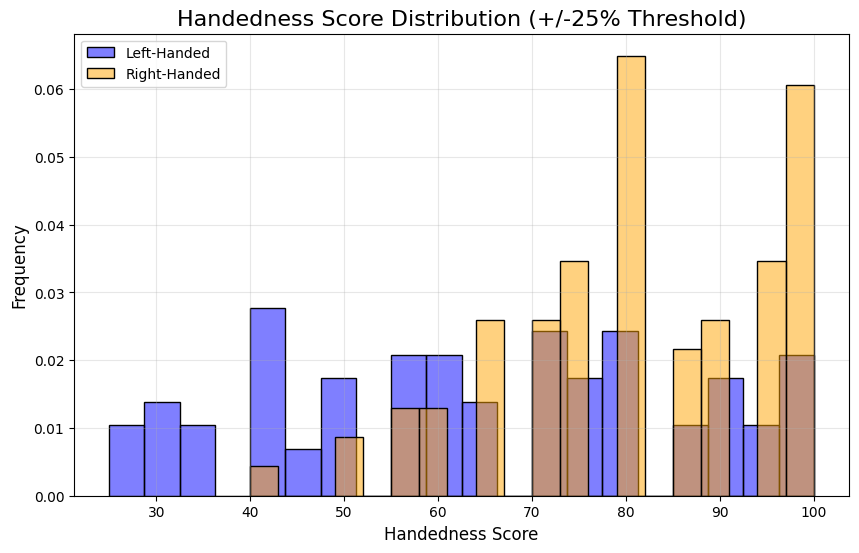

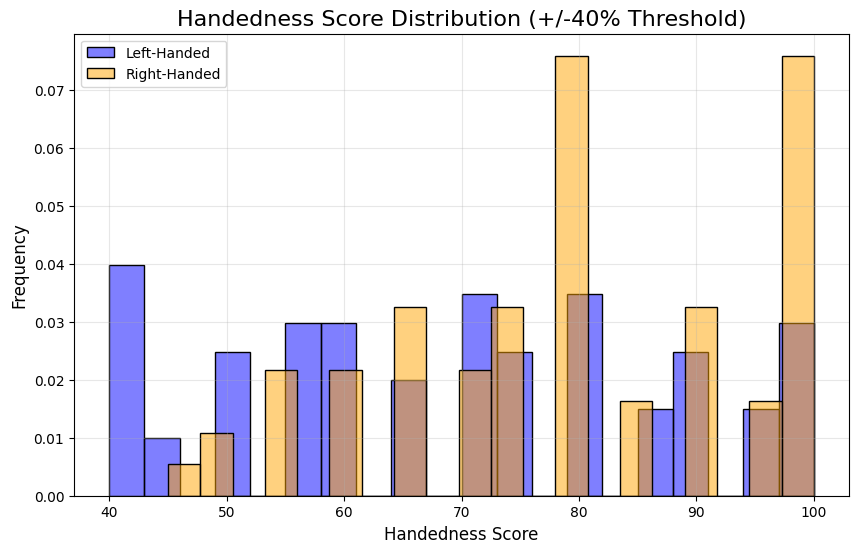

In [93]:
def handedness_distribution(df, title):
    plt.figure(figsize=(10, 6))
    
    # Plot histogram for each group
    sns.histplot(data=df[df['Class'] == 0]['Handedness'].abs(), label='Left-Handed', color='blue', kde=False, bins=20, alpha=0.5, stat='density')
    sns.histplot(data=df[df['Class'] == 1]['Handedness'], label='Right-Handed', color='orange', kde=False, bins=20, alpha=0.5, stat='density')
    
    
    plt.title(title, fontsize=16)
    plt.xlabel('Handedness Score', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


handedness_distribution(balanced_data_25, "Handedness Score Distribution (+/-25% Threshold)")
handedness_distribution(balanced_data_40, "Handedness Score Distribution (+/-40% Threshold)")

Other features:

/var/folders/bz/8tkr7qg51_1bcjy3cf4g8fzc0000gn/T/ipykernel_28089/1476580000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Class', y = feature, palette='muted')


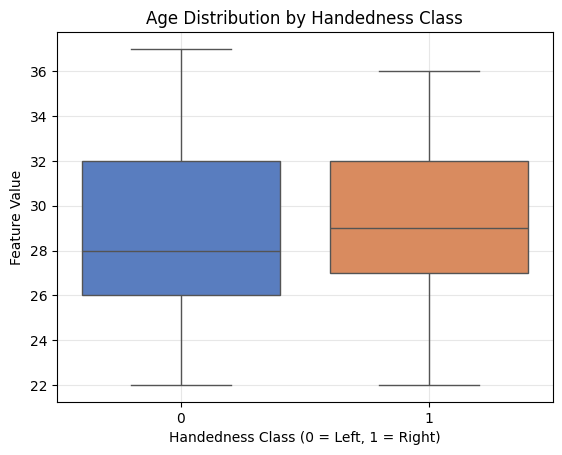

In [94]:
def continuous_features_w_handedness(df, feature, title):
    # Example: Visualize a continuous feature (e.g., brain activity score)
    sns.boxplot(data=df, x='Class', y = feature, palette='muted')
    plt.title(title)
    plt.xlabel('Handedness Class (0 = Left, 1 = Right)')
    plt.ylabel('Feature Value')
    plt.grid(alpha=0.3)
    plt.show()

continuous_features_w_handedness(balanced_data_25, 'Age_in_Yrs', 'Age Distribution by Handedness Class')



Distribution of categories across handedness groups

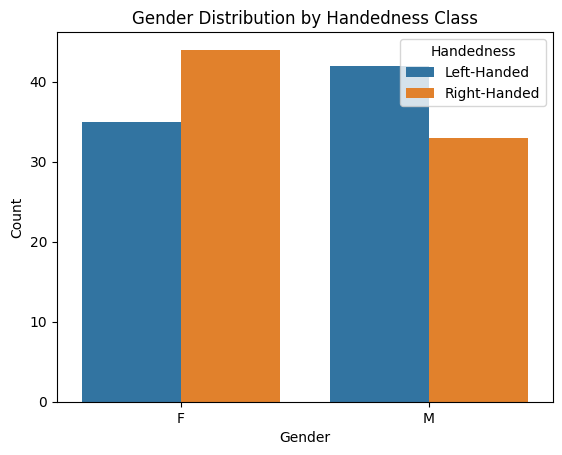

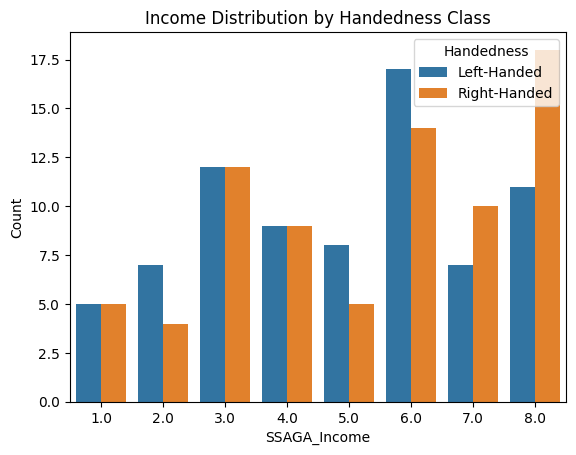

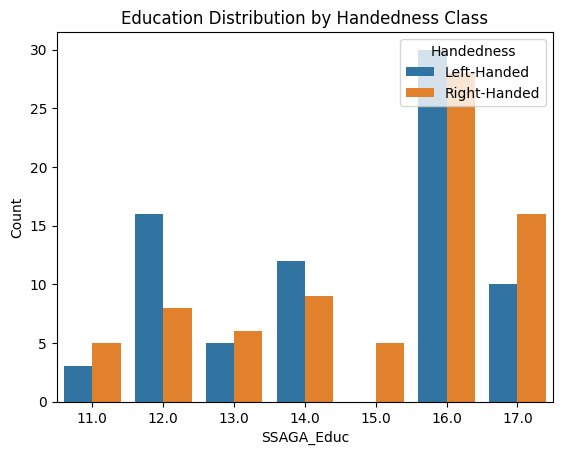

In [95]:
def categorical_features_w_handedness(df, feature, title):
    counts = df.groupby(['Class', feature]).size().reset_index(name='Count')

    sns.barplot(data=counts, x=feature, y='Count', hue='Class')
    plt.title(title)
    plt.xlabel(feature)
    plt.ylabel('Count')
    legend_labels = {'0': 'Left-Handed', '1': 'Right-Handed'}
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, [legend_labels[label] for label in labels], title="Handedness", loc='upper right')
    plt.show()

categorical_features_w_handedness(balanced_data_25, 'Gender', 'Gender Distribution by Handedness Class')
categorical_features_w_handedness(balanced_data_25, 'SSAGA_Income', 'Income Distribution by Handedness Class')
categorical_features_w_handedness(balanced_data_25, 'SSAGA_Educ', 'Education Distribution by Handedness Class')


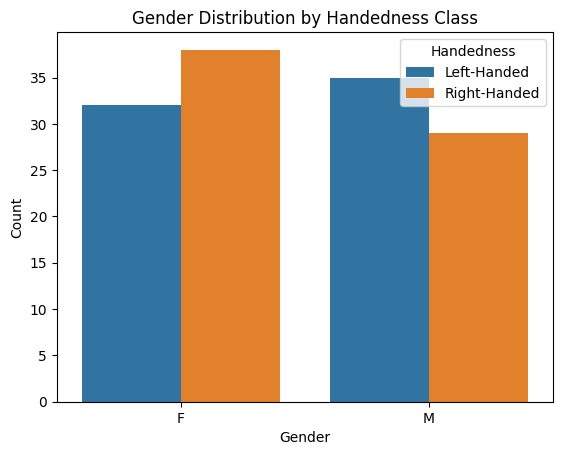

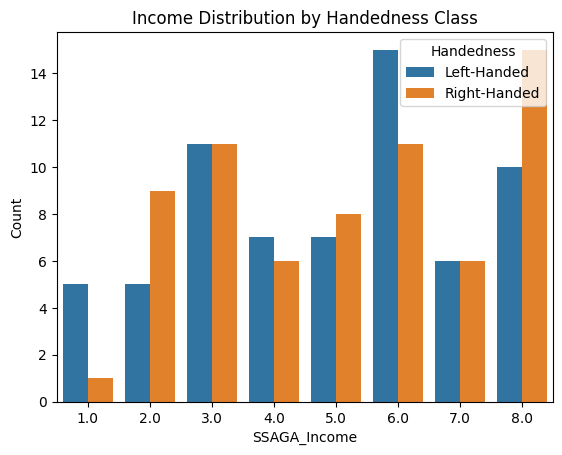

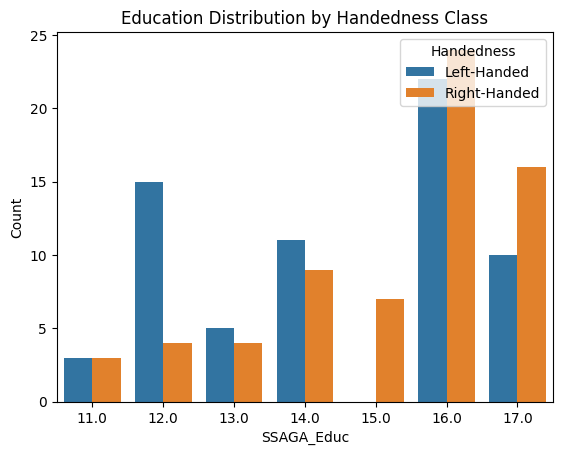

In [96]:
categorical_features_w_handedness(balanced_data_40, 'Gender', 'Gender Distribution by Handedness Class')
categorical_features_w_handedness(balanced_data_40, 'SSAGA_Income', 'Income Distribution by Handedness Class')
categorical_features_w_handedness(balanced_data_40, 'SSAGA_Educ', 'Education Distribution by Handedness Class')

To be continued on Week 3